### EpyModel examples
This notebook demonstrates how to instantiate, run, and plot the results for a few different discrete-time epidemiological models.

**Model classes**
* [SIR](#SIR)
* [SIRS](#SIRS)
* [SEIR](#SEIR)
* [NSEIRS_I](#NSEIRS_I)

**Additional features**
* [Saving & Loading](#saving)
* [Multiple runs](#runs)
* [Plotting](#plotting)
* [Random sampling](#sampling)


In [1]:
from EpyModels.utils import plot_states, save_model, load_model
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5

In [2]:
# Set initial parameters for all examples below.

# Environment parameters
pop = 100000000 # size of popluation
prop_S = 0.99 # % of population in Susceptible state (S), where applicable 
prop_E = 0 # [SIRS, and NSEIRS_I models only] % of population in Exposed state (E)
prop_I = 0.01 # % of population in Infected state (I)
prop_R = 0 # % of population in Recovered state (R)
prop_N = 0 # [NSEIRS_I model only] % of population in Not susceptible state (N)

# Disease parameters
b = 2.3/11 # % the number of people that one infected individual will infect or expose in one time unit
s_rate=0.01 #  [SIRS, and NSEIRS_I models only] the number of people that one infected individual will infect (or expose) in one time unit
i_rate=1/3 # [SEIR, and NSEIRS_I models only] 1/(the average number of days an exposed person becomes infected)
r_rate = 0.8/22 # The average rate at which an infected person recovers 
m_rate = 0.03/22 # the average rate at which an infected person dies

<a id='SIR'></a>

## SIR model 
This is a simple a implementation of discrete-time SIR *(Susceptible-Infected-Recovered)* model with an extra state, *D*, tracking mortalities.

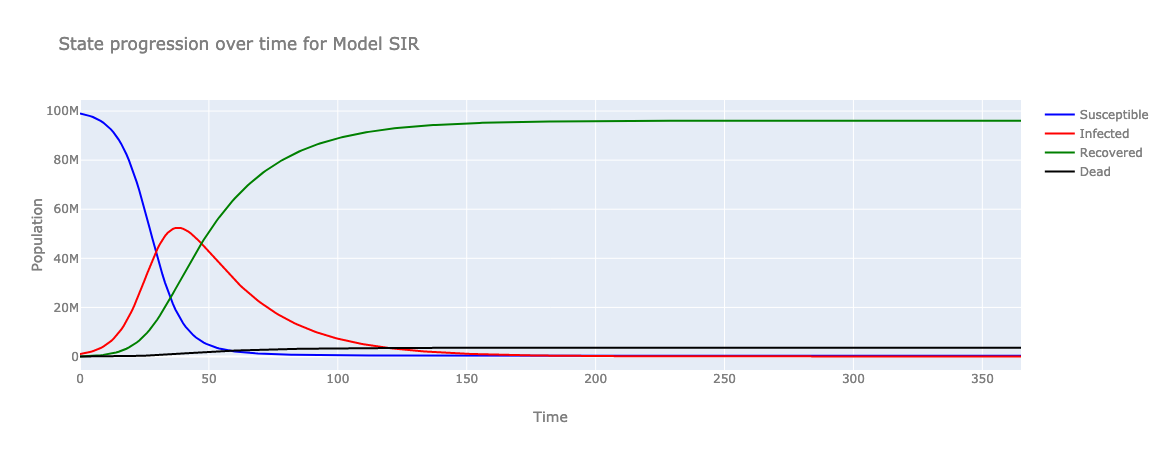

In [3]:
# SIR
from EpyModels.models.SIR import SIR

model_SIR = SIR(name="SIR",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            recovery_rate=r_rate,
            mortality_rate=m_rate)

# Run model for 365 time units
model_SIR.run(T=365)

# Plot states over time
plot_states(model_SIR,type='line')

<a id='SIRS'></a>

## SIRS model 
An implementation of discrete-time SIRS *(Susceptible-Infected-Recovered-Susceptible)* model with an extra state, *D*, tracking mortalities.

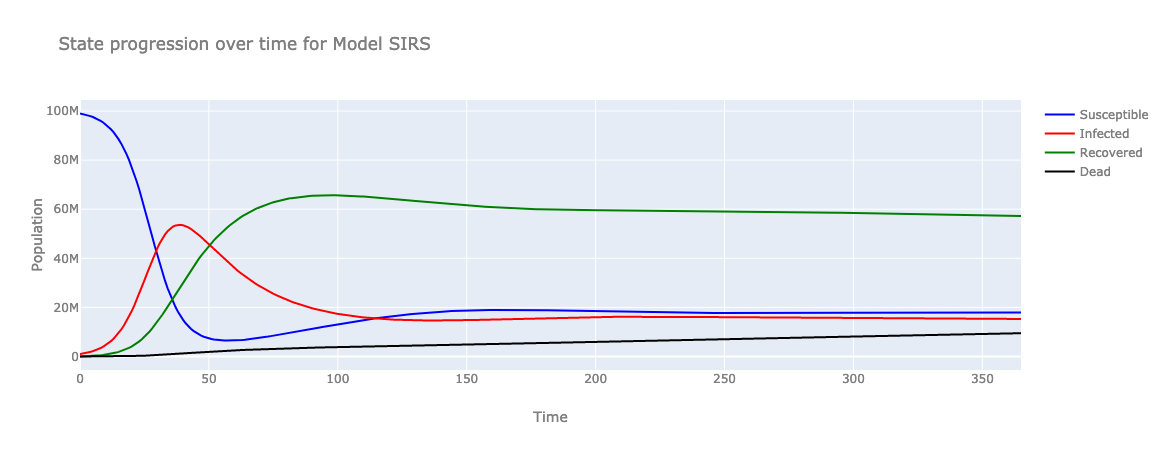

In [4]:
# SIRS
from EpyModels.models.SIRS import SIRS

model_SIRS = SIRS(name="SIRS",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            susceptible_rate=s_rate,
            recovery_rate=r_rate,  
            mortality_rate=m_rate)

model_SIRS.run(T=365)

plot_states(model_SIRS)

<a id='SEIR'></a>

## SEIR model 
An implementation of discrete-time SEIR *(Susceptible-Exposed-Infected-Recovered)* model with an extra state, *D*, tracking mortalities.

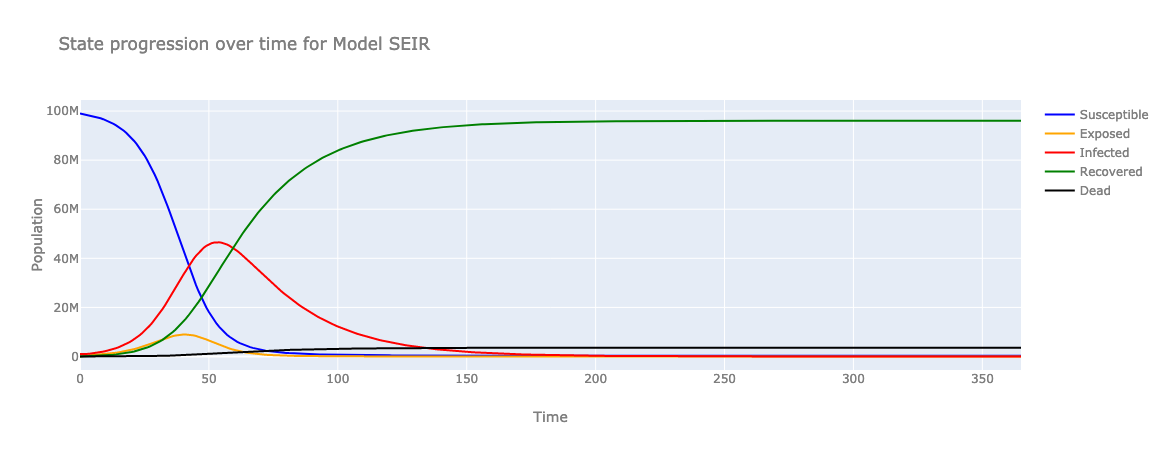

In [5]:
# Simple SEIR
from EpyModels.models.SEIR import SEIR

model_SEIR = SEIR(name="SEIR",
            population=pop,
            init_s=prop_S,
            init_e=prop_E,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            incubation_rate=i_rate,
            recovery_rate=r_rate,  
            mortality_rate=m_rate)

model_SEIR.run(T=365)

plot_states(model_SEIR)

<a id='NSEIRS_I'></a>

## NSEIRS_I model 
An implementation of discrete-time NSEIRS *(Not susceptible-Susceptible-Exposed-Infected-Recovered-Susceptible)* model with an extra state, *D*, for mortalities. (Also, this model needs a better name :)

This class can accepts an optional argument `interventions`, which takes a dictionary of interventions (vaccination and/or a tranmission reduction intervention) in the following format: `{'vaccination_time':<start_time>,'vaccination_rate':<people_per_day>, 'intervention_time': <start_time>, 'intervention_effect':<reduction on transmission rate beta>}`

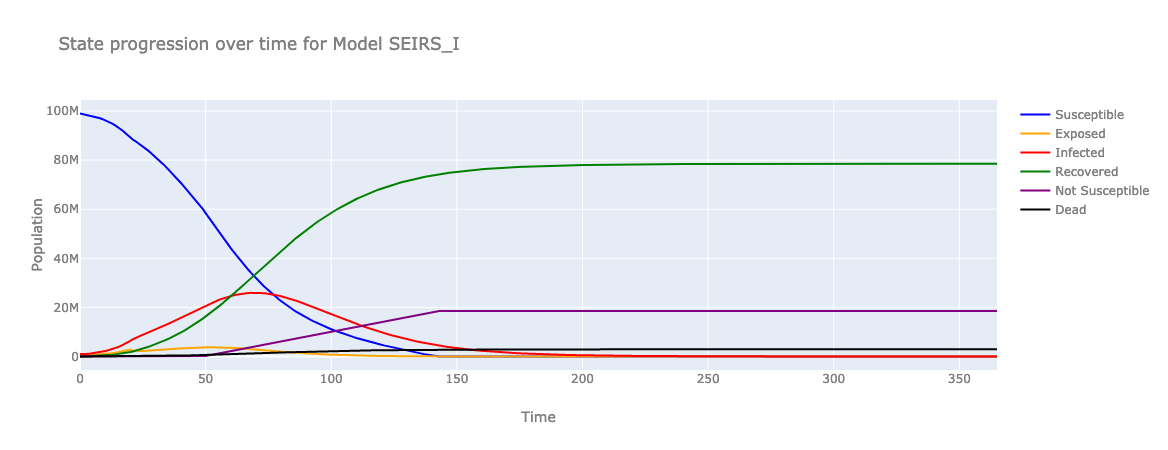

In [6]:
# Simple SEIRS_I
from EpyModels.models.NSEIRS_I import NSEIRS_I

model_NSEIRS_I = NSEIRS_I(name="SEIRS_I",
            population=pop,
            init_s=prop_S,
            init_e=prop_E,
            init_i=prop_I,
            init_n=prop_N,
            init_r=prop_R,
            beta=b,
            susceptible_rate=s_rate,
            incubation_rate=i_rate,
            recovery_rate=r_rate,  
            mortality_rate=m_rate,
            interventions={'vaccination_time':50,'vaccination_rate':200000, 'intervention_time': 21, 'intervention_effect':.5})

model_NSEIRS_I.run(T=365)

plot_states(model_NSEIRS_I)

<a id='saving'></a>

### Saving and loading models

In [7]:
# Save model
save_model(model_SIR,'SIR')

#load model
model_SIR = load_model('SIR.pkl')

<a id='runs'></a>

### Mulitple runs
The model can be run for multiple replications

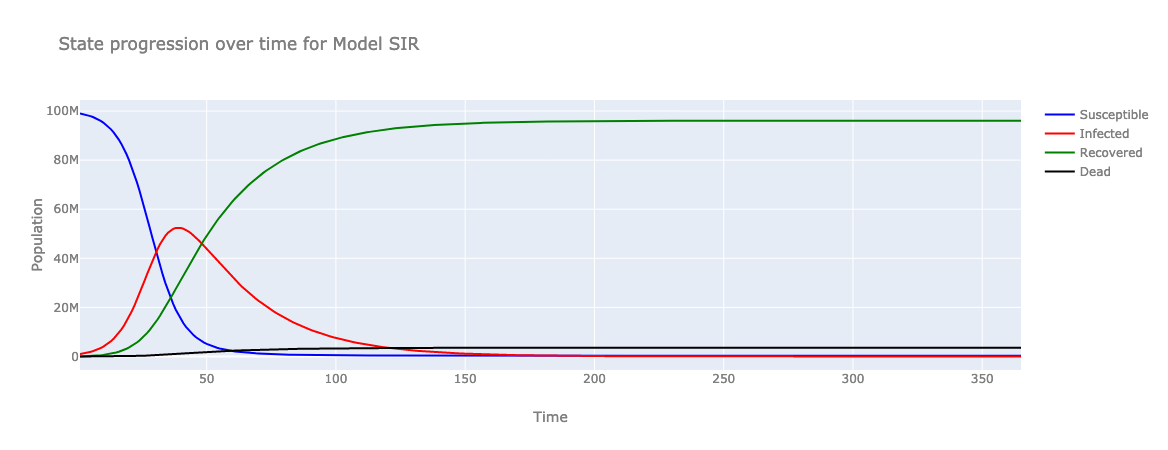

In [8]:
model_SIR = SIR(name="SIR",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            recovery_rate=r_rate,
            mortality_rate=m_rate)

# Specify number of runs in .run()
model_SIR.run(T=365,runs=3)

# Specify which run to plot
plot_states(model_SIR,type='line',run=2)

<a id='plotting'></a>

### Plotting model states over time

After running a model for some T > 1, you can plot the states over time using the plotting function, `plot_states(model, type='line',run=1)`, which takes three arguments: 
* `model`: A model object
* `type`: 'line' (default) or 'bar' (stacked bar plot) 
* `run`: 1 (default), any number from a simulation run for multiple replications.

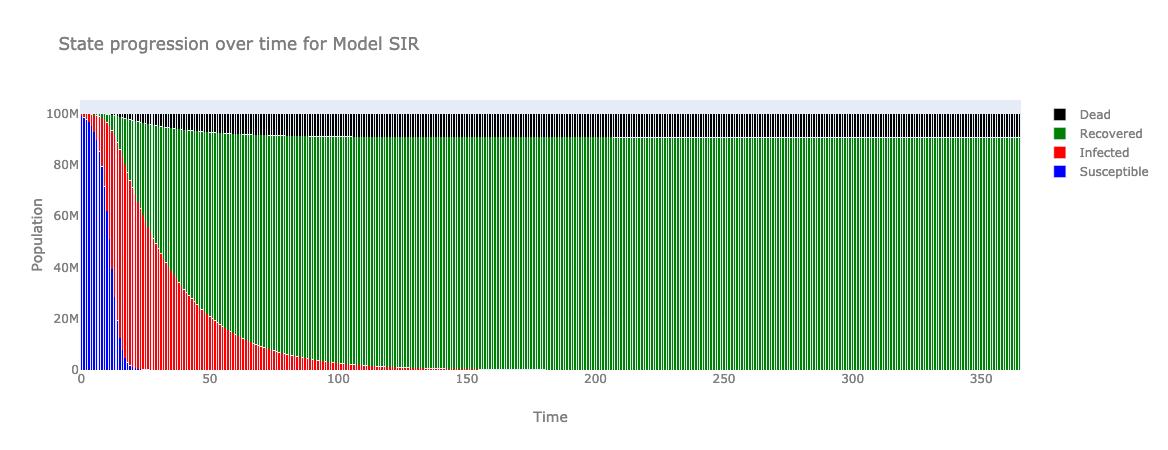

In [12]:
plot_states(model_SIR,type='bar',run=1)

<a id='sampling'></a>

### Adding randomness in model parameters
Model parameters can be randomly sampled at the begining of each run by passing a dict to the `dist_params` argument. The dcit should include a parameter name key, which maps to another dict containing the probability distribution name (valid names:`gaussian`, `uniform`, `triangular`, and `exponential`), and the parameters of that distribution along with their corresponding values. 
`e.g. {'param1_name: {'distribution': <dist_name1>, 'values':{<val1name>, : val1, <val2name>: val2, ...}}}`


Note in the example below that distribution parameter names follow the `numpy.random.*` parameter names (e.g. for `uniform` distribution, `np.random.uniform`, params would be `low` and `high`.) See the function  `generate_sample()` in `EpyModels/utils.py` and consult the numpy random function documentation for more details.


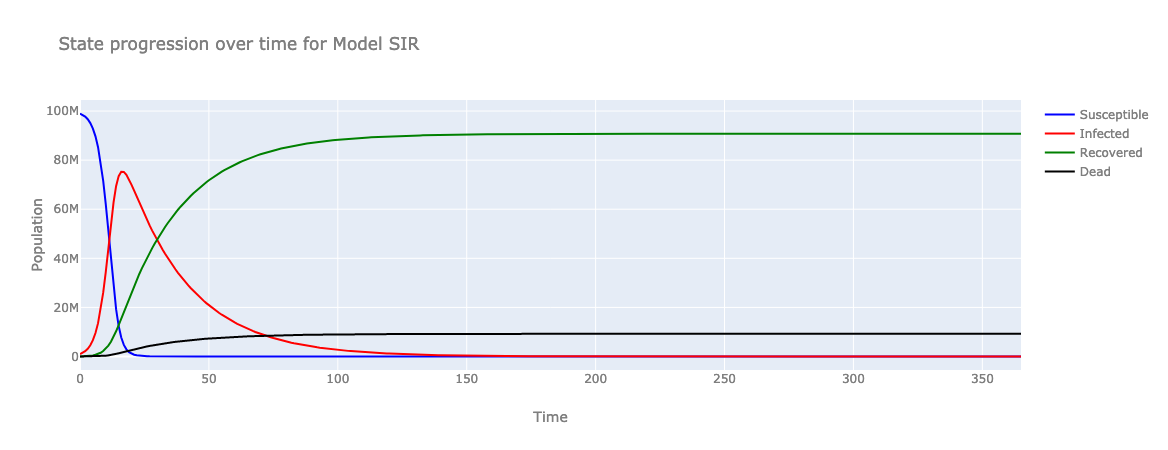

In [9]:
model_SIR = SIR(name="SIR",
            population=pop,
            init_s=prop_S,
            init_i=prop_I,
            init_r=prop_R,
            beta=b,
            recovery_rate=r_rate,
            mortality_rate=m_rate,
            dist_params={'beta': {'distribution':'uniform','values':{'low':1/7, 'high':4/7}},'mortality_rate': {'distribution':'uniform','values':{'low':0.03/14, 'high':0.1/14}} })


model_SIR.run(T=365)

# Specify which run to plot
plot_states(model_SIR,type='line')